In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [117]:
#Import merged dataset 
csv_path = "drought_temp_census_2010_2019.csv"
merged_df = pd.read_csv(csv_path)
merged_df = pd.DataFrame(merged_df)
merged_df.head()

,Unnamed: 0,Unnamed: 0.1,Year,County,None,D0,D1,D2,D3,D4,...,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Location ID,Month,Temp (F),Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,0,58,2010,Alameda County,84.000192,15.999808,2.624615,0.000000,0.0,0.0,...,69384.0,33961.0,165417.0,11.192100,CA-001,12,81.8,96,1.8,82.3
1,1,59,2010,Alpine County,87.179423,12.820577,1.116154,0.000000,0.0,0.0,...,63478.0,32159.0,145.0,12.329932,CA-003,12,75.7,100,2.6,75.0
2,2,60,2010,Amador County,92.307692,7.692308,0.000000,0.000000,0.0,0.0,...,54758.0,26329.0,2720.0,7.096825,CA-005,12,90.8,93,2.2,90.4
3,3,61,2010,Butte County,70.173462,29.826538,6.780385,0.676346,0.0,0.0,...,43170.0,23404.0,39290.0,17.970590,CA-007,12,92.7,85,2.2,92.3
4,4,62,2010,Calaveras County,93.010000,6.990000,0.000000,0.000000,0.0,0.0,...,54971.0,28408.0,3773.0,8.203244,CA-009,12,91.5,85,1.6,91.2


In [ ]:
plt.title("Poverty Rate v. Exceptional Drought (2010-2019)", fontsize = '18')

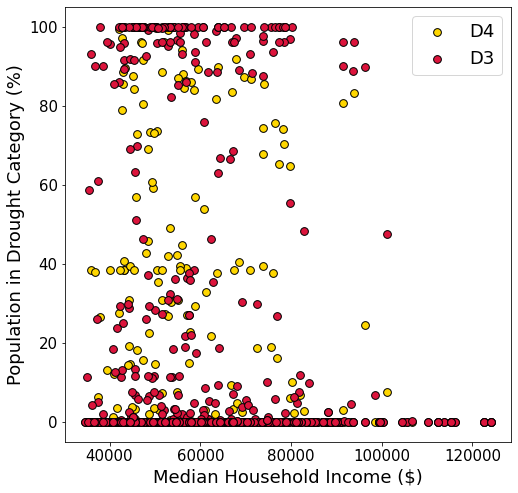

In [159]:
# Create a scatterplot for income v. drought category

#Define variables
x = merged_df['Household Income']
y = merged_df['D4']
y2 = merged_df['D3']
#Plot data

plt.figure(figsize=(8,8))
plt.xlabel("Median Household Income ($)", fontsize = '18')
plt.ylabel("Population in Drought Category (%)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="gold",edgecolors="black",s=60,label ='D4')
cap_plot = plt.scatter(x,y2, marker="o", color="crimson",edgecolors="black",s=60,label ='D3')
plt.legend()

plt.savefig('Figures/D4_D3_Income.png')

plt.show()

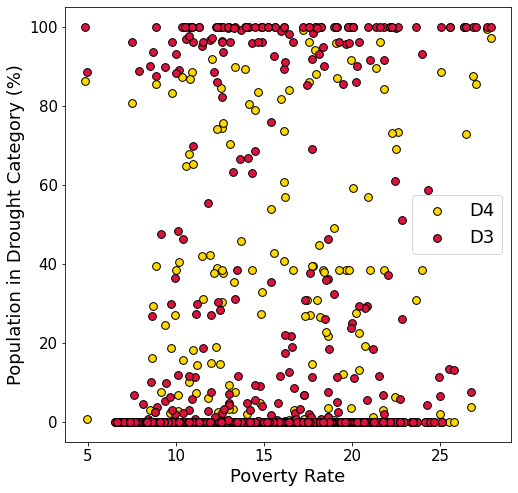

In [160]:
# Create a scatterplot for poverty rate v. drought category

#Define variables
x = merged_df['Poverty Rate']
y = merged_df['D4']
y2 = merged_df['D3']
#Plot data

plt.figure(figsize=(8,8))
plt.xlabel("Poverty Rate", fontsize = '18')
plt.ylabel("Population in Drought Category (%)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="gold",edgecolors="black",s=60,label ='D4')
cap_plot = plt.scatter(x,y2, marker="o", color="crimson",edgecolors="black",s=60,label ='D3')
plt.legend()

plt.savefig('Figures/D4_D3_PovertyRate.png')

plt.show()

In [158]:
#Look for correlations between income/poverty and counties where 100% of population experienced D4

D4 = merged_df.loc[merged_df["D4"] == 100]
D4_rate = D4["Poverty Rate"]
Other=merged_df.loc[merged_df["D4"] <100]
Other_rate = Other["Poverty Rate"]

#T-test for income between extreme and nonextremem max temps
st.ttest_ind(D4_rate, Other_rate, equal_var=False)

Ttest_indResult(statistic=0.6948936976943969, pvalue=0.5062880516708189)

In [25]:
#Bin household income 

bins = [0,35000,55000,75000,95000,115000,135000]
labels = ["0-35,000","35,000-55,000","55,000-75,000","75,000-95,000","95,000-115,000","115,000-135,000"]

merged_df["Income"] = pd.cut(merged_df["Household Income"],bins, labels=labels, include_lowest=True)
averaged = merged_df.groupby(merged_df['Income'])
averaged = averaged.mean()
averaged = averaged[['None','D0','D1','D2','D3','D4']]
averaged = averaged.reset_index()
averaged.head()

,Income,None,D0,D1,D2,D3,D4
0,"0-35,000",1.184904,98.815096,92.669712,66.545000,5.734327,0.000000
1,"35,000-55,000",38.622659,61.377341,49.291387,35.152141,23.181881,13.452032
2,"55,000-75,000",45.669414,54.330586,40.267793,29.267590,18.695769,10.531760
3,"75,000-95,000",40.558443,59.441557,41.002358,29.970700,18.811583,9.972237
4,"95,000-115,000",60.441125,39.558875,15.764837,12.586742,8.498133,1.905158


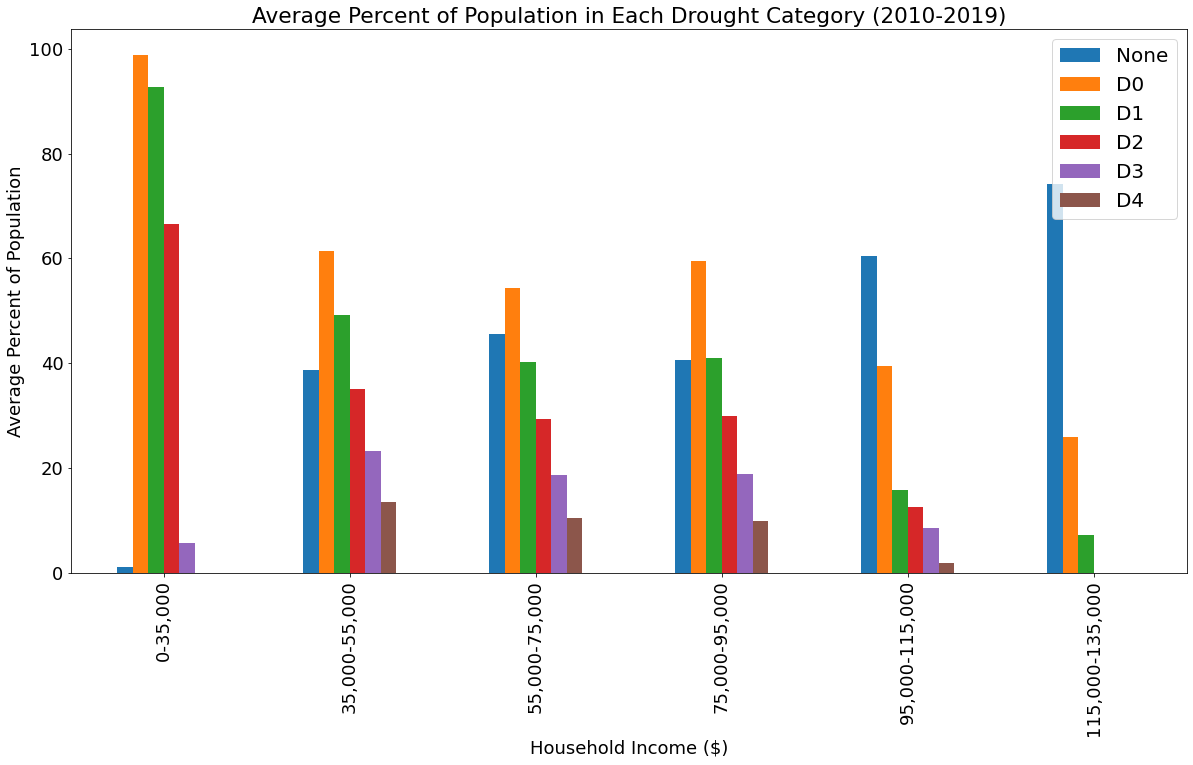

In [162]:
#Create a grouped bar chart of income level v. drought categories 
plt.rcParams.update({'font.size': 18})
averaged.plot(x='Income',
        kind='bar',
        stacked=False,
        title = title,
        figsize=(20,10), fontsize='18')

# Add text for labels, title and custom x-axis tick labels, etc.
plt.xlabel("Household Income ($)", fontsize='18')
plt.ylabel("Average Percent of Population",fontsize='18')
plt.legend(loc=1, prop={'size': 20})
title = "Average Percent of Population in Each Drought Category (2010-2019)"

plt.savefig('Figures/Drought_IncomeBins.png',bbox_inches='tight')

Correlation coefficient = 0.4
Linear regression model: y = 0.57x + 80.61
P-Value = 1.3399421099762888e-25


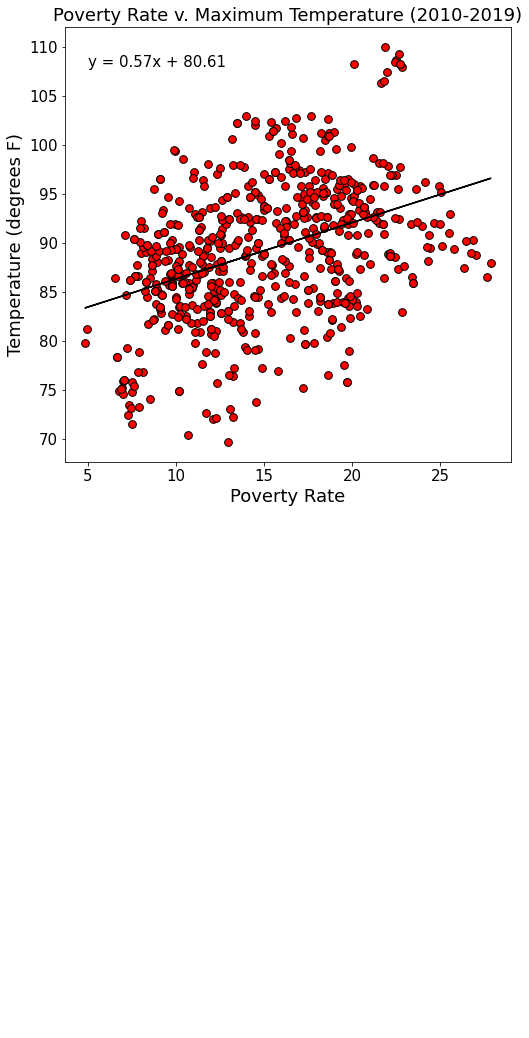

In [5]:
# Create a scatterplot for poverty rate v. maximum temperature

#Define variables
x = merged_df['Poverty Rate']
y = merged_df['Temp (F)']

#Plot data
plt.figure(figsize=(8,8))
plt.title("Poverty Rate v. Maximum Temperature (2010-2019)", fontsize = '18')
plt.xlabel("Poverty Rate", fontsize = '18')
plt.ylabel("Temperature (degrees F)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="red",edgecolors="black",s=60)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,108),fontsize=15,color="black")

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

plt.savefig('Figures/MaxTemp_PovertyRate.png')

plt.show()

Correlation coefficient = -0.4
Linear regression model: y = -0.0x + 98.88
P-Value = 1.2139651328246222e-25


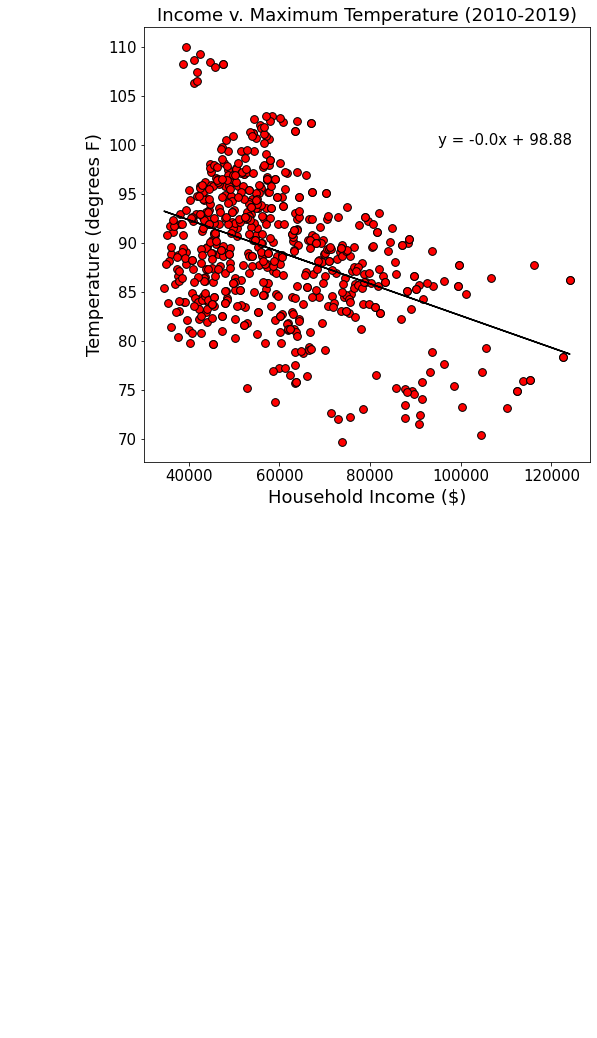

In [6]:
# Create a scatterplot for poverty rate v. household income

#Define variables
x = merged_df['Household Income']
y = merged_df['Temp (F)']

#Plot data
plt.figure(figsize=(8,8))
plt.title("Income v. Maximum Temperature (2010-2019)", fontsize = '18')
plt.xlabel("Household Income ($)", fontsize = '18')
plt.ylabel("Temperature (degrees F)", fontsize = '18')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cap_plot = plt.scatter(x,y, marker="o", color="red",edgecolors="black",s=60)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(95000,100),fontsize=15,color="black")

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')

plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

plt.savefig('Figures/MaxTemp_Income.png')

plt.show()

In [163]:
#Create variable for income in counties with max temps over 103.9 F
Extreme_temp = merged_df.loc[merged_df["Temp (F)"]>103.9]
Ext_temp_income = Extreme_temp["Household Income"]
Ext_ave = Extreme_temp["Household Income"].mean()
Ext_ave

42947.0

In [164]:
#Create variable for income in counties with max temps under 103.9 F
Nonextreme_temp = merged_df.loc[merged_df["Temp (F)"]<103.9]
Nonext_temp_income = Nonextreme_temp["Household Income"]
Non_ave=Nonextreme_temp["Household Income"].mean()
Non_ave

59701.02392344498

In [9]:
#T-test for income between extreme and nonextremem max temps
st.ttest_ind(Ext_temp_income, Nonext_temp_income, equal_var=False)

Ttest_indResult(statistic=-14.585135877577466, pvalue=3.8539459042890484e-13)